In [93]:

import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
np.random.seed(0)
random.seed(0)

import re
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
from collections import Counter

import nltk
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('wordnet')

In [94]:
# loading dataset
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')
df.head(20)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1 star
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1 star
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1 star
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1 star
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4 stars


In [95]:
# data cleaning
def text_clean(text):
    
    text=re.sub("\[.*#&]"," ",text)
    
    
    #removing the emails
    text=re.sub("https?://\S+|www\.\S+","",text)
    
    text=re.sub("[^a-zA-Z0-9\s]+","",text)
    
    #removing the numbers
    text = re.sub('\w*\d\w*', '', text)
    
    #removing the stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

   
    return text
    
df['clean_review'] = [clean(review) for review in df['review']]
df['clean_review'].head(20)
#  

#import re
#import string

#def clean(review):
#    review = review.lower()
#    review = review.replace('ï', '')
#    review = review.replace('¿', '')
#    review = review.replace('½', '')
#    review = review.replace('ý', '')
#    review = " ".join(review.split())
#    review = review.rstrip()
#    return review

#df['clean_review'] = [clean(review) for review in df['review']]
#df['clean_review'].head(20)

0     why does it look like someone spit on my food?...
1     it'd mcdonalds. it is what it is as far as the...
2     made a mobile order got to the speaker and che...
3     my mc. crispy chicken sandwich was customer se...
4     i repeat my order 3 times in the drive thru, a...
5     i work for door dash and they locked us all ou...
6     if i could give this location a zero on custom...
7     came in and ordered a large coffee w/no ice. t...
8     went thru drive thru. ordered. getting home no...
9     i'm not really a huge fan of fast food, but i ...
10                                       worst mcdonald
11    we stopped by for a quick breakfast. it was no...
12    the morning crew seems fast and efficient. nig...
13    today, i was disappointed in that restaurant #...
14    ordered food burger wrong and left out part of...
15    this was a dine in experience. the tables were...
16    the line ws extremely big and was moving very ...
17    the boy who attended me made me wait and w

In [96]:
# create tf-idf and vocab list for each rating 

from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_list = []
tfidf_vocab = {}

for rating in sorted(df.rating.unique()):
    tfidf_list.append(tfidf_vectorizer.fit_transform(df[df.rating == rating].clean_review))
    tfidf_vocab[rating] = tfidf_vectorizer.get_feature_names_out()

[print(f'\nRating: {rating} stars', '\nTFIDF array: ', tfidf.toarray(), '\nVocab list: ', tfidf_vocab[rating]) for rating, tfidf in zip(sorted(df.rating.unique()), tfidf_list)]



Rating: 1 star stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '000' '0000000' ... 'zombies' 'zone' 'zoo']

Rating: 2 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '00am' '01' ... 'yummy' 'zero' 'zoo']

Rating: 3 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '01' '02' ... 'zero' 'zone' 'zoo']

Rating: 4 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['00' '00pm' '10' ... 'yummy' 'yup

[None, None, None, None, None]

In [97]:
# dimensionality reduction to perform all-by-all cosine similarities 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize


shrunk_norm_matrix_list = []

for tfidf in tfidf_list:
    shrunk_norm_matrix_list.append(normalize(TruncatedSVD(n_components=100, random_state=42).fit_transform(tfidf)))
    
cosine_similarity_matrix = [shrunk_norm_matrix @ shrunk_norm_matrix.T for shrunk_norm_matrix in shrunk_norm_matrix_list]
cosine_similarity_matrix

[array([[ 1.        ,  0.12088323, -0.0078843 , ..., -0.00762407,
         -0.0052868 ,  0.10019433],
        [ 0.12088323,  1.        ,  0.06783246, ..., -0.02090068,
         -0.0258837 ,  0.02193616],
        [-0.0078843 ,  0.06783246,  1.        , ...,  0.02252939,
          0.14367982,  0.10065092],
        ...,
        [-0.00762407, -0.02090068,  0.02252939, ...,  1.        ,
          0.5952827 ,  0.07540192],
        [-0.0052868 , -0.0258837 ,  0.14367982, ...,  0.5952827 ,
          1.        ,  0.10612319],
        [ 0.10019433,  0.02193616,  0.10065092, ...,  0.07540192,
          0.10612319,  1.        ]]),
 array([[ 1.        ,  0.11738598,  0.05866192, ...,  0.19254422,
          0.059129  ,  0.01689466],
        [ 0.11738598,  1.        , -0.01017104, ...,  0.00998012,
          0.03093797,  0.01527998],
        [ 0.05866192, -0.01017104,  1.        , ..., -0.01349031,
          0.02476878, -0.02894549],
        ...,
        [ 0.19254422,  0.00998012, -0.01349031, ...,  

In [98]:
# elbow curve function
from sklearn.cluster import MiniBatchKMeans
import time

np.random.seed(0)
def generate_elbow_plot(matrix_list):
    start_time = time.time()
    for index, matrix in enumerate(matrix_list):
        k_values = range(1, 61)
        inertia_values = [MiniBatchKMeans(k, random_state=42).fit(matrix).inertia_ for k in k_values]
        plt.plot(k_values, inertia_values, label=[f'{index+1} star'])
        plt.xlabel('K')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.legend()
    plt.show()
    return print(f'{round(time.time() - start_time)} seconds')

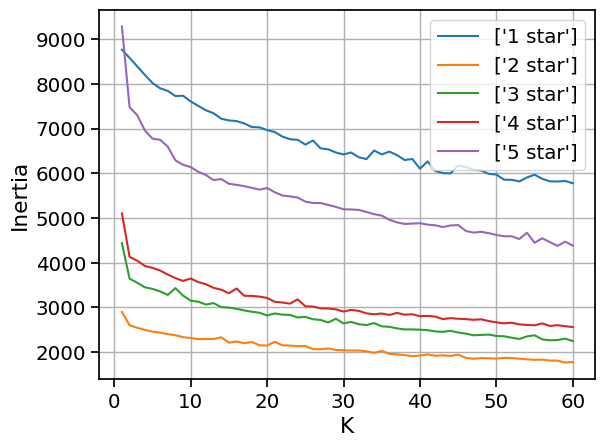

89 seconds


In [99]:
import warnings
warnings.filterwarnings("ignore")

# elbow curve of all ratings 
generate_elbow_plot(shrunk_norm_matrix_list)

In [100]:
# function that creates KMeans for reviews
from sklearn.cluster import KMeans

def compute_cluster_groups(shrunk_norm_matrix, k=10, review=df['clean_review']):
    cluster_model = KMeans(n_clusters=k, random_state=42)
    clusters = cluster_model.fit_predict(shrunk_norm_matrix)
    df = pd.DataFrame({'Index' : range(clusters.size), 'Cluster' : clusters, 'Review' : review})
    return [df_cluster for _, df_cluster in df.groupby('Cluster')]

In [101]:
# clusters for each rating 
cluster_groups = []

for index, rating in enumerate(sorted(df.rating.unique())):
    cluster_groups.append(compute_cluster_groups(shrunk_norm_matrix_list[index], review=df[df.rating == rating].clean_review))
    
print([("For: ", rating, "\n", cluster_groups[index]) for index, rating in enumerate(sorted(df.rating.unique()))][:10])

[('For: ', '1 star', '\n', [       Index  Cluster                                             Review
12         8        0  the morning crew seems fast and efficient. nig...
24        15        0                          didnt take card. but didn
25        16        0  mcdonalds is proud to own the most broken ice ...
35        22        0  this location is a horrible store to work for....
44        27        0  the drinks were watered down and the employee ...
...      ...      ...                                                ...
33322   9414        0                          1 hour for two hamburgers
33341   9419        0   very, very time consuming to deliver the snacks.
33346   9421        0  attitude of the managers as if she were the ow...
33349   9423        0                   no good unhealthy dirty bathroom
33391   9430        0                        they treated me very badly.

[2631 rows x 3 columns],        Index  Cluster                                             Revi

In [102]:
!pip install wordcloud
from wordcloud import WordCloud

def cluster_to_wordcloud(cluster_group, max_words=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_group)
    vocab_list = vectorizer.get_feature_names_out()
    
    # create a rank list of words
    df_ranked = pd.DataFrame({'Word' : vocab_list, 'Sum TFIDF': tfidf_matrix.toarray().sum(axis=0)}).sort_values('Sum TFIDF', ascending=False)
    
    # create word score
    word_to_score = {word: score for word, score in df_ranked[:max_words].values}
    
    # initialize wordcloud object
    wordcloud_generator = WordCloud(background_color='white')

    # fit wordcloud_generator to word_to_score
    wordcloud_image = wordcloud_generator.fit_words(word_to_score)
    
    return wordcloud_image


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
def grid_wordcloud(cluster_groups, rating_num, max_words=10, rows=5, columns=2, figsize=(10,10)):
    rating_list = []
    fig, ax = plt.subplots(rows, columns, figsize=figsize)
    for index, cluster in enumerate(cluster_groups):
        row = index // columns
        column = index % columns
        wordcloud_image = cluster_to_wordcloud(cluster_groups[index].Review, max_words)
        ax[row][column].imshow(wordcloud_image, interpolation='bilinear')
        ax[row][column].set_title(f'Cluster: {index}')
        ax[row][column].set_xticks([])
        ax[row][column].set_yticks([])
    fig.suptitle(f"{rating_num}:", fontsize=20)

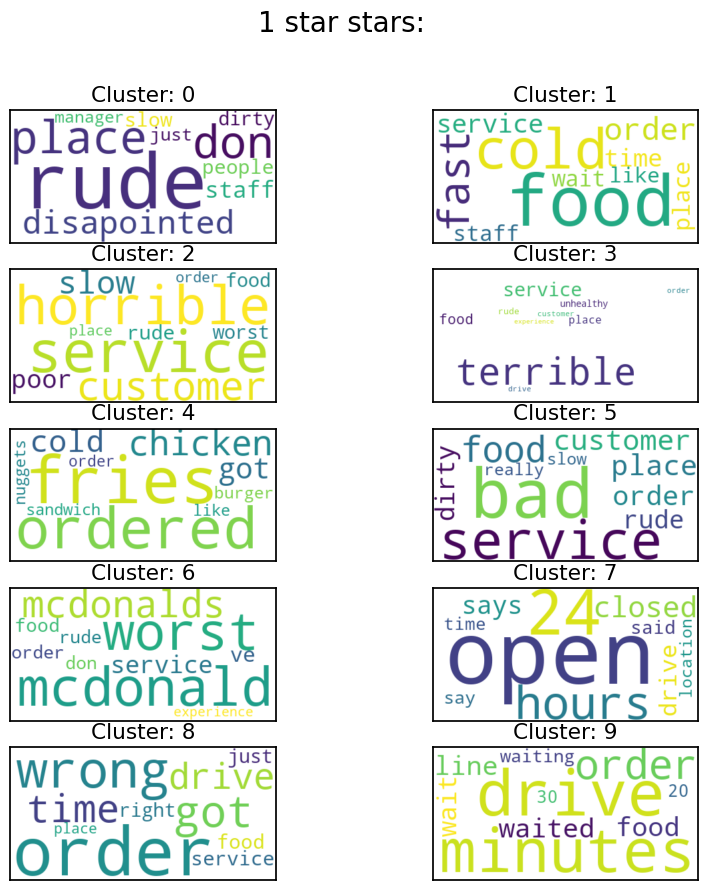

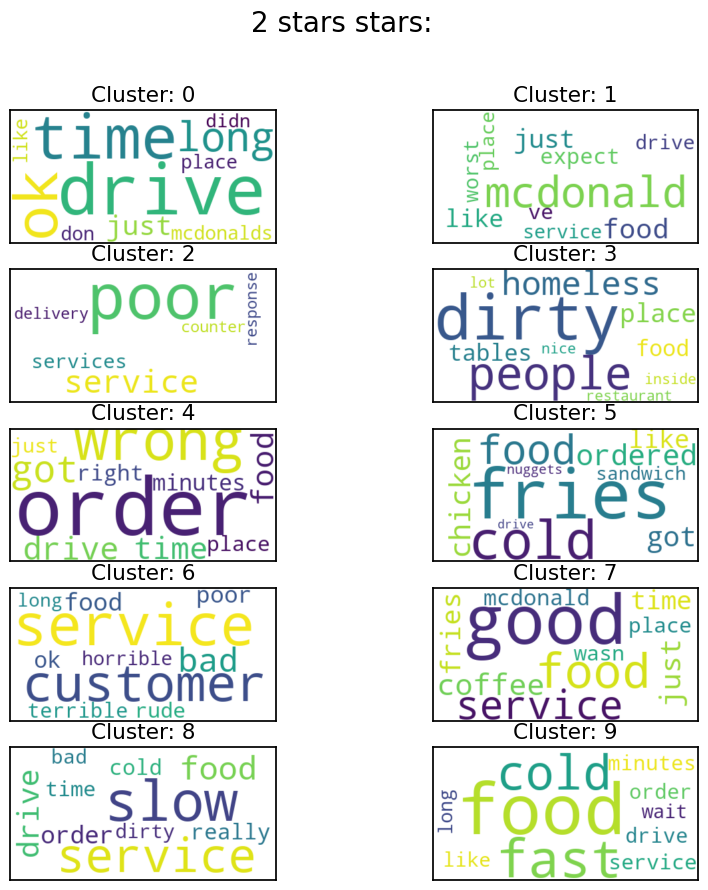

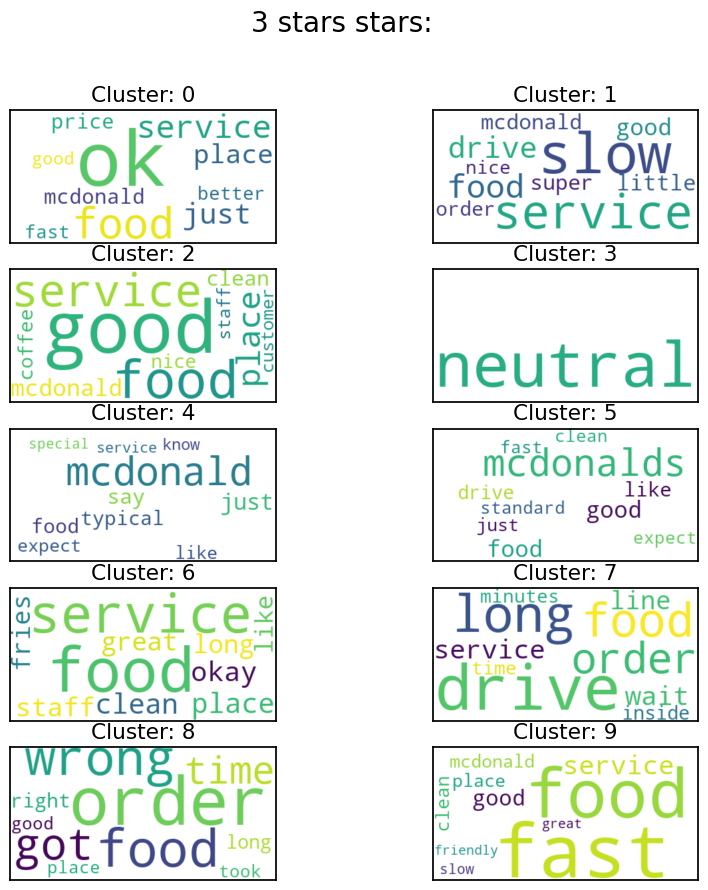

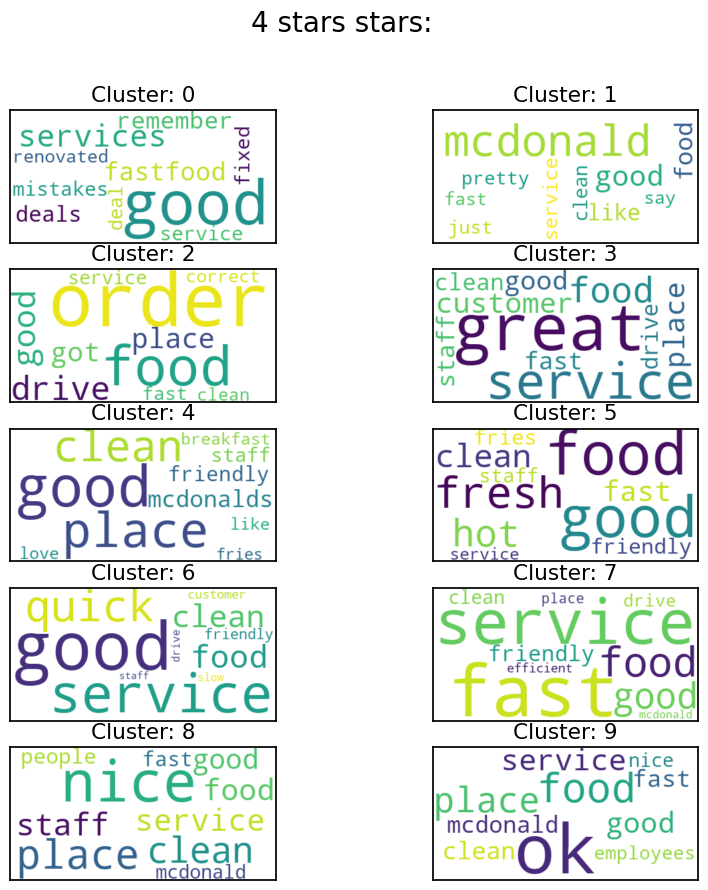

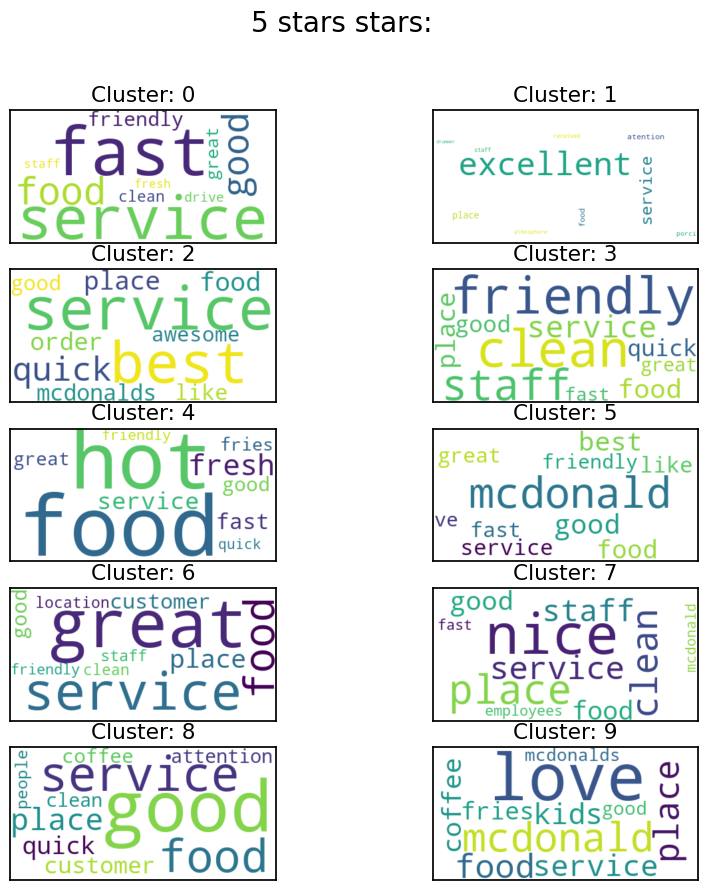

In [104]:
# all clusters wordclouds for each rating
for index, rating in enumerate(sorted(df.rating.unique())):
    grid_wordcloud(cluster_groups[index], rating_num=f'{rating} stars')


graph for frequency of words

In [105]:
df=df[['review','rating']]
df.columns=['text','label']

In [106]:
df['text']=df['text'].astype('str') #converting all sentence and numbers into string
#converting into the lowercase
def lowercase(text):
    text=text.lower()
    return text

df['text']=df['text'].apply(lowercase)

df["text"]=df["text"].apply(text_clean)  

In [117]:
stemmer = SnowballStemmer('english')


def stem_text(text):
    
    # Tokenize the input text into individual words
    tokens=nltk.word_tokenize(text)
    
    
    # stemmer_token is nltk feature that implement snowballstemer for each word
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

df['text'] = df['text'].apply(stem_text)
    

,text,label
0,whi doe look like someon spit food normal tran...,1
1,mcdonald far food atmosph go staff doe make di...,4
2,made mobil order got speaker check line move l...,1
3,mc crispi chicken sandwich custom servic quick p,5
4,repeat order time drive thru still manag mess ...,1


In [118]:
replacements = {'1 star': 1, '2 stars': 2, '3 stars': 3,'4 stars': 4,'5 stars': 5}

# Replace the values in multiple columns
df.replace(replacements, inplace=True)

<Figure size 1000x500 with 0 Axes>

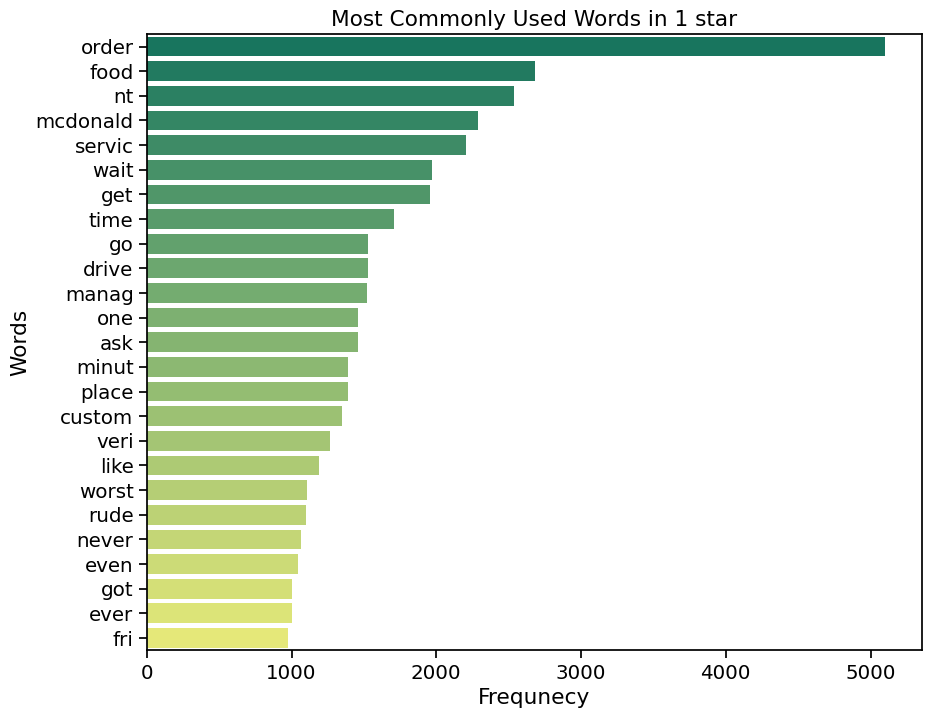

In [119]:
star_ratings_1= " ".join(df[df['label'] == 1]['text']) 

plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 1 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();

plot_words_freq((star_ratings_1).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

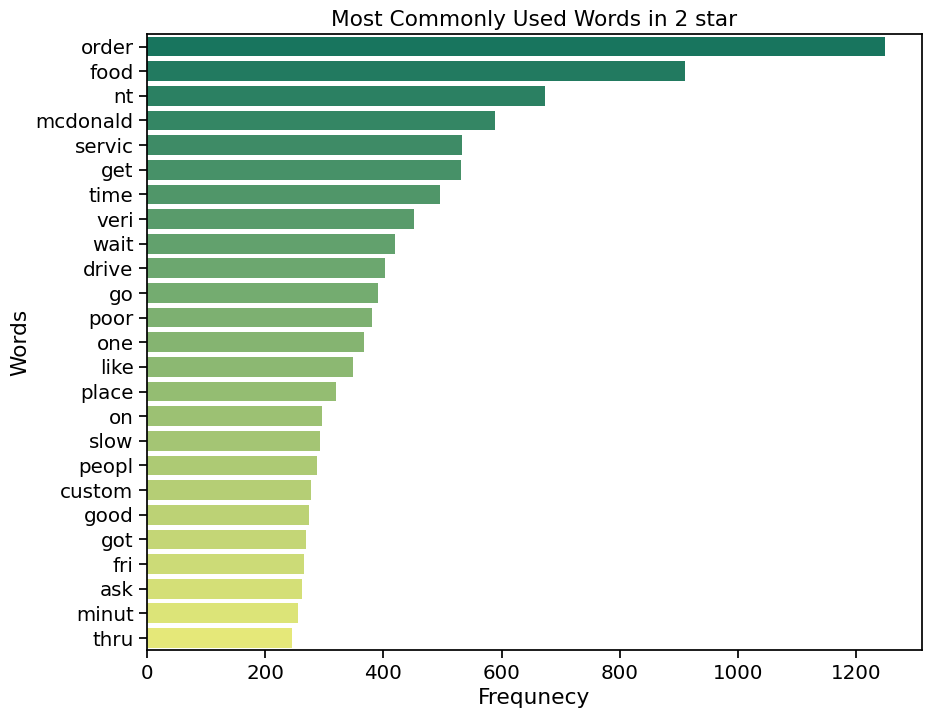

In [120]:
star_ratings_2= " ".join(df[df['label'] ==2]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 2 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_2).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

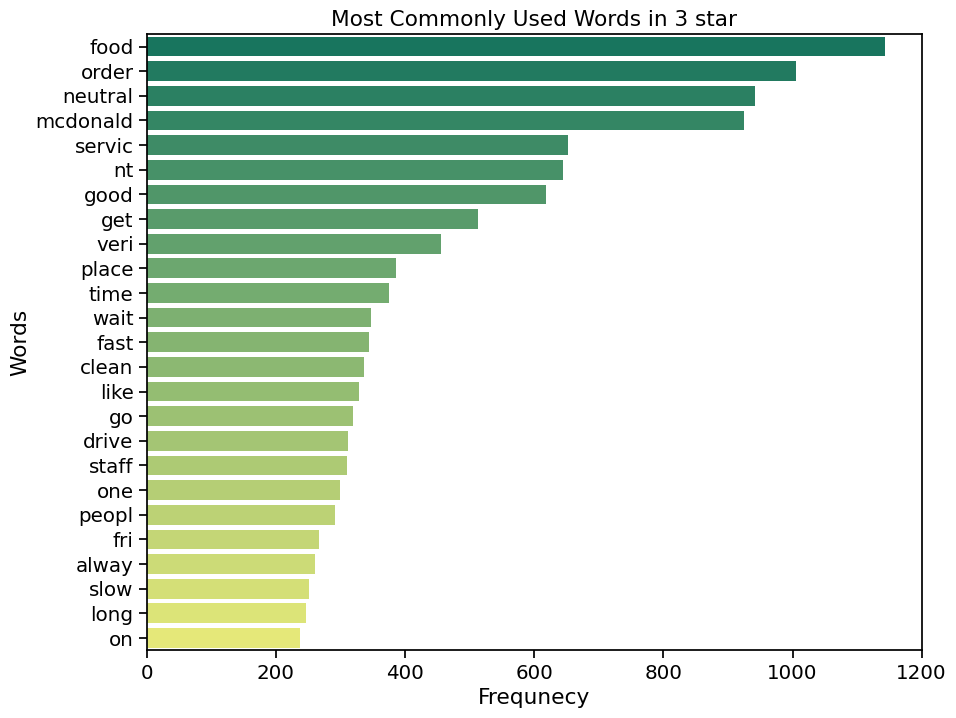

In [121]:
star_ratings_3= " ".join(df[df['label'] ==3]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 3 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_3).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

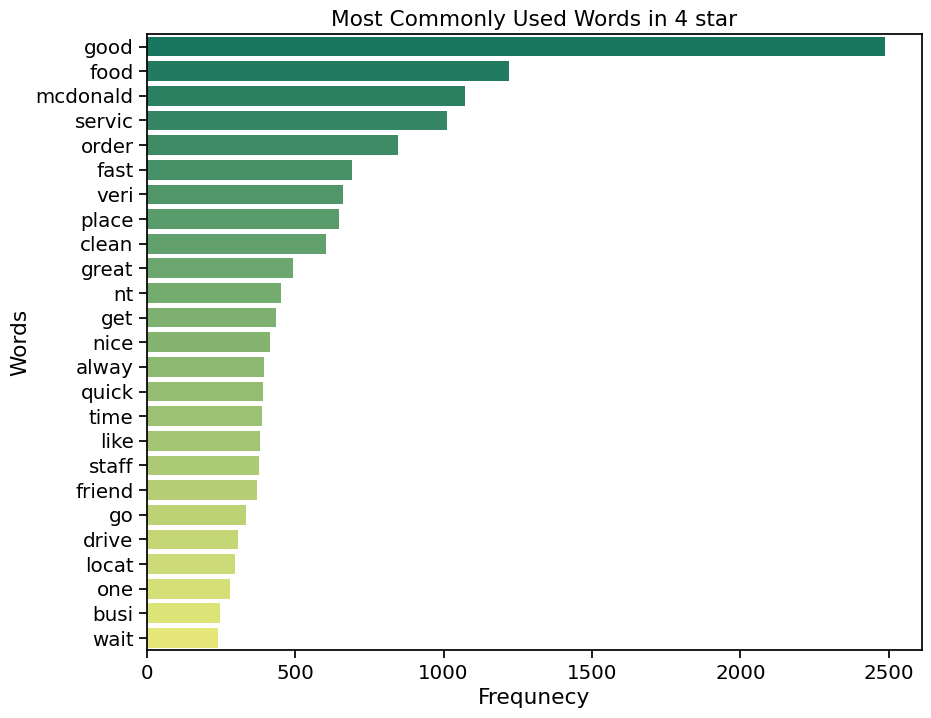

In [122]:
star_ratings_4= " ".join(df[df['label'] ==4]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 4 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_4).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

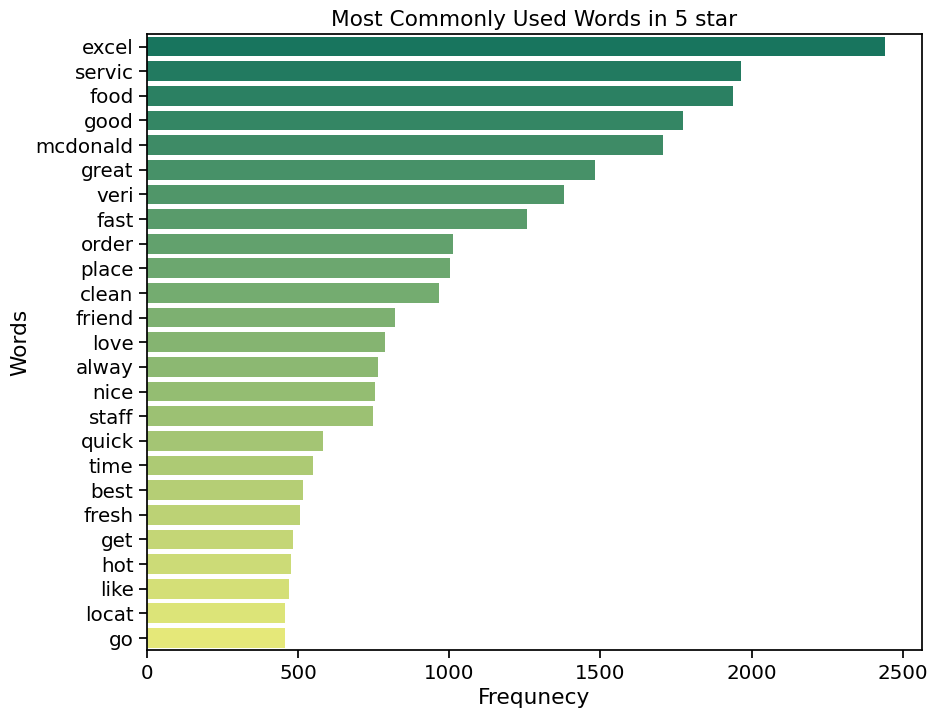

In [123]:
star_ratings_5= " ".join(df[df['label'] ==5]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 5 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_5).split());
plt.show()